In [1]:
import pandas as pd
import math
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

PATH_movies = "movie_recommendations.xlsx"
movies_df = pd.read_excel(PATH_movies)

In [2]:
# produce clean unique index
movies_df.sort_values(by=['Name', 'Genre', 'Reviewer'], inplace=True)
#clean = movies_df.drop_duplicates().dropna()
movies_df['Genre'] = movies_df['Genre'].str.lower()
users = movies_df['Reviewer'].unique() # list of unique reviewer

long_format_movies = movies_df.groupby(['Genre', 'Reviewer'])['Rating'].mean()
wide_format_movies = long_format_movies.unstack(0)
wide_format_movies.fillna(0.0, inplace=True) # null values get a 0 rating

In [3]:
def cosim(v, w): # calculate cosine similarity
    return np.dot(v, w) / math.sqrt(np.dot(v, v) * np.dot(w, w))

In [4]:
subset_list = []
cosim_result = []
for user in range(2, 3):
    for subset in itertools.combinations(users, user):
        print(subset, cosim(wide_format_movies.loc[subset[0]],wide_format_movies.loc[subset[1]]))
        subset_list.append(subset)
        cosim_result.append(cosim(wide_format_movies.loc[subset[0]],wide_format_movies.loc[subset[1]]))

('Felipe', 'Helena') 0.41736285205886114
('Felipe', 'Matthias') 0.22894205054794922
('Felipe', 'Nick') 0.33968311024337877
('Felipe', 'Manohar') 0.49965339859670077
('Felipe', 'Tom') 0.0
('Felipe', 'Kristian') 0.527164619630825
('Felipe', 'Julian') 0.0
('Felipe', 'Glynis') 0.33968311024337877
('Felipe', 'Nicolas') 0.0
('Felipe', 'Paul') 0.5272256356506433
('Helena', 'Matthias') 0.24429437600537085
('Helena', 'Nick') 0.29488391230979427
('Helena', 'Manohar') 0.38973343099519797
('Helena', 'Tom') 0.06620339266654701
('Helena', 'Kristian') 0.50556782044981
('Helena', 'Julian') 0.09761906491267601
('Helena', 'Glynis') 0.3686048903872428
('Helena', 'Nicolas') 0.10425720702853737
('Helena', 'Paul') 0.3432692561589696
('Matthias', 'Nick') 0.64590434974699
('Matthias', 'Manohar') 0.5031419593007852
('Matthias', 'Tom') 0.37828645375016023
('Matthias', 'Kristian') 0.40814472683650466
('Matthias', 'Julian') 0.5577957321646877
('Matthias', 'Glynis') 0.3369935737810383
('Matthias', 'Nicolas') 0.595

In [5]:
cosim_result = pd.DataFrame(cosim_result)

cosim_result['user1'], cosim_result['user2'] = np.nan, np.nan

In [6]:
for i in range(0,55):
    cosim_result['user1'][i] = subset_list[i][0]
    cosim_result['user2'][i] = subset_list[i][1]

/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

In [7]:
cosim_result.rename(columns = {0:'cosim'},inplace=True)
cosim_result.sort_values(by='cosim',ascending=False,inplace=True)
cosim_result.head(5)

,cosim,user1,user2
50,0.936329,Julian,Nicolas
53,0.665190,Glynis,Paul
19,0.645904,Matthias,Nick
43,0.635001,Tom,Nicolas
25,0.595726,Matthias,Nicolas


In [8]:
result = []
for n1 in users:
    row = []
    for n2 in users:
        c = cosim(wide_format_movies.loc[n1], wide_format_movies.loc[n2])
        row.append(c)
    result.append(row)

In [11]:
cosim_df = pd.DataFrame(result, index = users,columns=users)

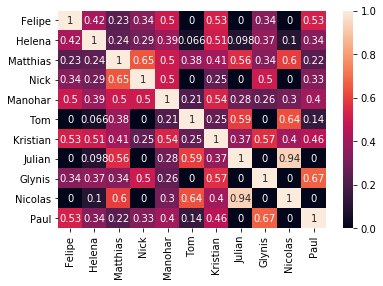

In [12]:
sns.heatmap(cosim_df,annot=True)